## Практическая работа

In [1]:
import pandas as pd

# Загрузка данных из файла merged_df_cp.csv
merged_df_cp = pd.read_csv('merged_df_cp.csv')

# Вывод размерности и первых 5 строк данных
merged_df_cp.shape

(15458682, 16)

In [2]:
merged_df_cp['client_id'] = merged_df_cp['client_id'].astype(str)
merged_df_cp['visit_datetime'] = pd.to_datetime(merged_df_cp['visit_datetime'], utc=True)

In [3]:
merged_sh = merged_df_cp.sample(frac=0.1)

In [4]:
merged_sh.shape

(1545868, 16)

In [5]:
merged_sh.head(50)

,client_id,hit_number,hit_page_path,event_category,event_action,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime
11414563,161575999.1634969,13,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,sub_header_link_click,1,iNFgfQPqHPBuvGCYtrQE,cpc,DWdObWJnYkxegWsWkVuy,other,mobile,491x1091,Chrome,Russia,Reutov,2021-10-23 09:09:33+00:00
1372827,106350095.16359366,3,sberauto.com/cars/lada-vaz?city=1&city=18&rent...,search_form,search_form_mark_select,28,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1920x1080,Chrome,Russia,Voronezh,2021-11-15 15:22:28+00:00
7034530,1632437837.1623676,27,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,quiz_start,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,375x812,Safari,Russia,Moscow,2021-06-14 16:00:00+00:00
8724065,45151329.16299263,68,sberauto.com/cars/eb5698f6?rental_page=rental_car,quiz,quiz_show,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1280x720,YaBrowser,Russia,Nizhny Novgorod,2021-08-26 00:00:00+00:00
7419529,1371350061.1624916,2,podpiska.sberauto.com/,sub_page_view,sub_landing,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x760,Android Webview,Russia,Vladivostok,2021-06-29 00:00:00+00:00
11225786,1345775290.163164,123,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_new_card,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1280x720,YaBrowser,Russia,Obninsk,2021-09-14 20:00:00+00:00
12728020,1717481627.1630623,45,sberauto.com/cars/76c0f0b5?utm_source_initial=...,card_web,photos_all,2,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,414x896,Safari,Russia,Moscow,2021-09-04 02:00:00+00:00
9807934,984273176.1625924,3,podpiska.sberauto.com/,sub_page_view,sub_landing,3,geDcueAOghDzHkGMmdOq,cpm,FTjNLDyTrXaWYgZymFkV,WYLajZgbUhGimwBKDZUH,mobile,412x915,Android Webview,Russia,Krasnodar,2021-07-14 16:00:00+00:00
14466187,1542700172.1635609,5,podpiska.sberauto.com/,sub_page_view,sub_landing,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,360x640,Chrome,Russia,Saint Petersburg,2021-10-30 18:54:19+00:00
13835437,436029300.1635368,19,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,view_new_card,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,1920x1080,YaBrowser,Russia,Moscow,2021-10-27 23:52:09+00:00


In [6]:
valid_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click',
                 'sub_open_dialog_click', 'sub_custom_question_submit_click',
                 'sub_call_number_click', 'sub_callback_submit_click',
                 'sub_submit_success', 'sub_cart_request_submit_click']

merged_sh['event_action_new'] = merged_sh['event_action'].apply(lambda x: 1 if x in valid_actions else 0)

In [7]:
merged_sh = merged_sh.drop(['event_action'], axis=1)

In [8]:
merged_sh.head(50)

,client_id,hit_number,hit_page_path,event_category,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime,event_action_new
11414563,161575999.1634969,13,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,1,iNFgfQPqHPBuvGCYtrQE,cpc,DWdObWJnYkxegWsWkVuy,other,mobile,491x1091,Chrome,Russia,Reutov,2021-10-23 09:09:33+00:00,0
1372827,106350095.16359366,3,sberauto.com/cars/lada-vaz?city=1&city=18&rent...,search_form,28,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1920x1080,Chrome,Russia,Voronezh,2021-11-15 15:22:28+00:00,0
7034530,1632437837.1623676,27,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,375x812,Safari,Russia,Moscow,2021-06-14 16:00:00+00:00,0
8724065,45151329.16299263,68,sberauto.com/cars/eb5698f6?rental_page=rental_car,quiz,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1280x720,YaBrowser,Russia,Nizhny Novgorod,2021-08-26 00:00:00+00:00,0
7419529,1371350061.1624916,2,podpiska.sberauto.com/,sub_page_view,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x760,Android Webview,Russia,Vladivostok,2021-06-29 00:00:00+00:00,0
11225786,1345775290.163164,123,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1280x720,YaBrowser,Russia,Obninsk,2021-09-14 20:00:00+00:00,0
12728020,1717481627.1630623,45,sberauto.com/cars/76c0f0b5?utm_source_initial=...,card_web,2,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,414x896,Safari,Russia,Moscow,2021-09-04 02:00:00+00:00,0
9807934,984273176.1625924,3,podpiska.sberauto.com/,sub_page_view,3,geDcueAOghDzHkGMmdOq,cpm,FTjNLDyTrXaWYgZymFkV,WYLajZgbUhGimwBKDZUH,mobile,412x915,Android Webview,Russia,Krasnodar,2021-07-14 16:00:00+00:00,0
14466187,1542700172.1635609,5,podpiska.sberauto.com/,sub_page_view,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,360x640,Chrome,Russia,Saint Petersburg,2021-10-30 18:54:19+00:00,0
13835437,436029300.1635368,19,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,1920x1080,YaBrowser,Russia,Moscow,2021-10-27 23:52:09+00:00,0


In [9]:
# заменяем уникальные значения столбца utm_source на source1, source2 и так далее
unique_sources = merged_sh['utm_source'].unique()
replacement_map = {source: f'source{i+1}' for i, source in enumerate(unique_sources)}
merged_sh['utm_source'] = merged_sh['utm_source'].map(replacement_map)

In [10]:
merged_sh.head(50)

,client_id,hit_number,hit_page_path,event_category,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime,event_action_new
11414563,161575999.1634969,13,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,1,source1,cpc,DWdObWJnYkxegWsWkVuy,other,mobile,491x1091,Chrome,Russia,Reutov,2021-10-23 09:09:33+00:00,0
1372827,106350095.16359366,3,sberauto.com/cars/lada-vaz?city=1&city=18&rent...,search_form,28,source2,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1920x1080,Chrome,Russia,Voronezh,2021-11-15 15:22:28+00:00,0
7034530,1632437837.1623676,27,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,1,source3,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,375x812,Safari,Russia,Moscow,2021-06-14 16:00:00+00:00,0
8724065,45151329.16299263,68,sberauto.com/cars/eb5698f6?rental_page=rental_car,quiz,1,source3,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1280x720,YaBrowser,Russia,Nizhny Novgorod,2021-08-26 00:00:00+00:00,0
7419529,1371350061.1624916,2,podpiska.sberauto.com/,sub_page_view,1,source3,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x760,Android Webview,Russia,Vladivostok,2021-06-29 00:00:00+00:00,0
11225786,1345775290.163164,123,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,1,source4,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1280x720,YaBrowser,Russia,Obninsk,2021-09-14 20:00:00+00:00,0
12728020,1717481627.1630623,45,sberauto.com/cars/76c0f0b5?utm_source_initial=...,card_web,2,source5,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,414x896,Safari,Russia,Moscow,2021-09-04 02:00:00+00:00,0
9807934,984273176.1625924,3,podpiska.sberauto.com/,sub_page_view,3,source6,cpm,FTjNLDyTrXaWYgZymFkV,WYLajZgbUhGimwBKDZUH,mobile,412x915,Android Webview,Russia,Krasnodar,2021-07-14 16:00:00+00:00,0
14466187,1542700172.1635609,5,podpiska.sberauto.com/,sub_page_view,1,source7,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,360x640,Chrome,Russia,Saint Petersburg,2021-10-30 18:54:19+00:00,0
13835437,436029300.1635368,19,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,1,source8,cpc,other,other,desktop,1920x1080,YaBrowser,Russia,Moscow,2021-10-27 23:52:09+00:00,0


In [11]:
grouped = merged_sh.groupby(['utm_source', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted = grouped.sort_values(by=1, ascending=False)
print(grouped_sorted)

event_action_new       0     1
utm_source                    
source5           509330  3044
source3           319636  2028
source2           173989  1318
source4           131647  1165
source8           120519   747
...                  ...   ...
source201              2     0
source202              1     0
source203              1     0
source204              1     0
source196              2     0

[214 rows x 2 columns]


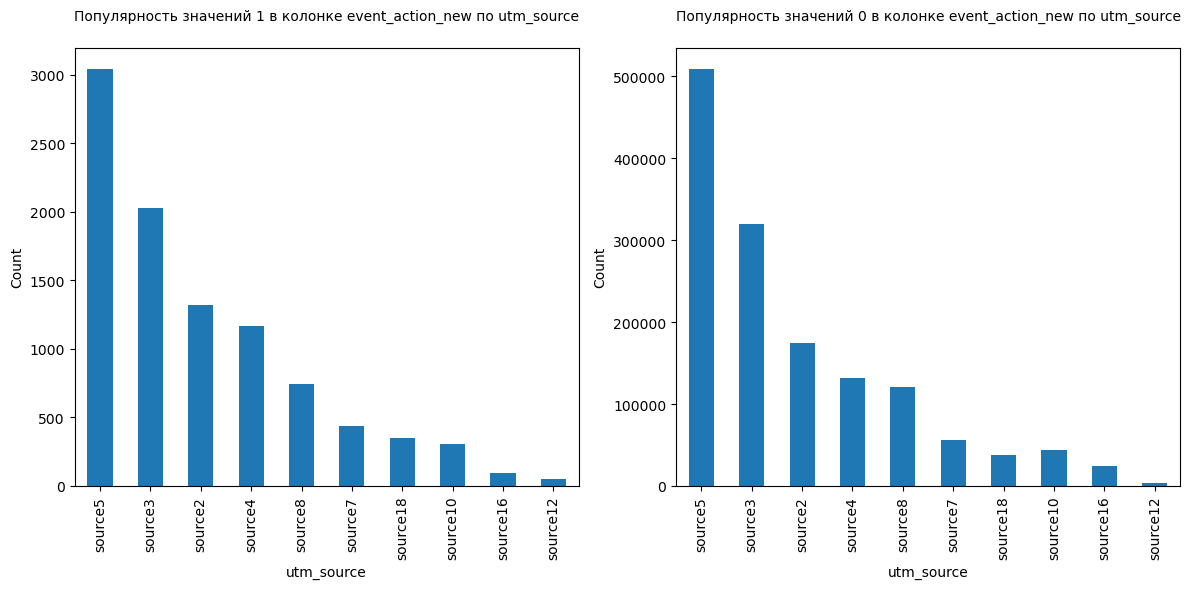

In [12]:
import matplotlib.pyplot as plt

top_10 = grouped_sorted.head(10)
top_10_only_1 = top_10[1]
plt.subplot(1, 2, 1)
top_10_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по utm_source', pad=20, fontsize=10)
plt.xlabel('utm_source')
plt.ylabel('Count')

top_10_only_0 = top_10[0]
plt.subplot(1, 2, 2)
top_10_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по utm_source', pad=20, fontsize=10)
plt.xlabel('utm_source')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [13]:
unique_sources2 = merged_sh['utm_campaign'].unique()
replacement_map2 = {source: f'source{i+1}' for i, source in enumerate(unique_sources2) if source != 'other'}
merged_sh['utm_campaign'] = merged_sh['utm_campaign'].map(replacement_map2).fillna(merged_sh['utm_campaign'])

grouped2 = merged_sh.groupby(['utm_campaign', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted2 = grouped2.sort_values(by=1, ascending=False)
print(grouped_sorted2)

event_action_new       0     1
utm_campaign                  
source2           508446  3719
source14          315216  1681
other             215554  1510
source3           110657   932
source4            73572   476
...                  ...   ...
source1              151     0
source265             16     0
source266             19     0
source267             23     0
source264             43     0

[368 rows x 2 columns]


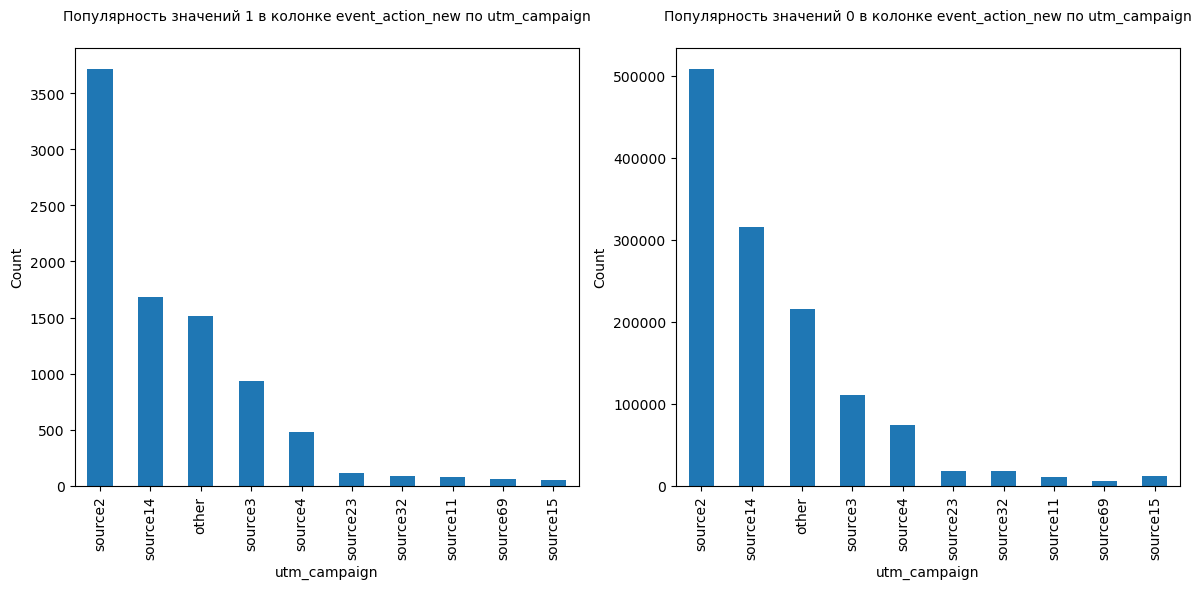

In [14]:
top_10_2 = grouped_sorted2.head(10)
top_10_2_only_1 = top_10_2[1]
plt.subplot(1, 2, 1)
top_10_2_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по utm_campaign', pad=20, fontsize=10)
plt.xlabel('utm_campaign')
plt.ylabel('Count')

top_10_2_only_0 = top_10_2[0]
plt.subplot(1, 2, 2)
top_10_2_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по utm_campaign', pad=20, fontsize=10)
plt.xlabel('utm_campaign')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
unique_sources3 = merged_sh['utm_medium'].unique()
replacement_map3 = {source: f'source{i+1}' for i, source in enumerate(unique_sources3) if source != 'other'}
merged_sh['utm_medium'] = merged_sh['utm_medium'].map(replacement_map3).fillna(merged_sh['utm_medium'])

grouped3 = merged_sh.groupby(['utm_medium', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted3 = grouped3.sort_values(by=1, ascending=False)
print(grouped_sorted3)

event_action_new       0     1
utm_medium                    
source5           484264  2840
source3           319636  2028
source1           315569  1951
source4           188612  1660
source6            72369   497
source2            64035   403
source9            25061   178
source8            23852    91
source14            4866    49
source10            8090    43
source11            3170    37
source18            2688    22
source7             9501    18
source23            1243    13
source22             421     8
source16              92     7
source30              38     7
source17            2087     7
source21            1481     6
source20             212     5
source12             864     5
source13            3326     4
source15            3334     3
source27              20     1
source19             359     1
source43               2     0
source38               2     0
source42               1     0
source41               1     0
source40               1     0
source39

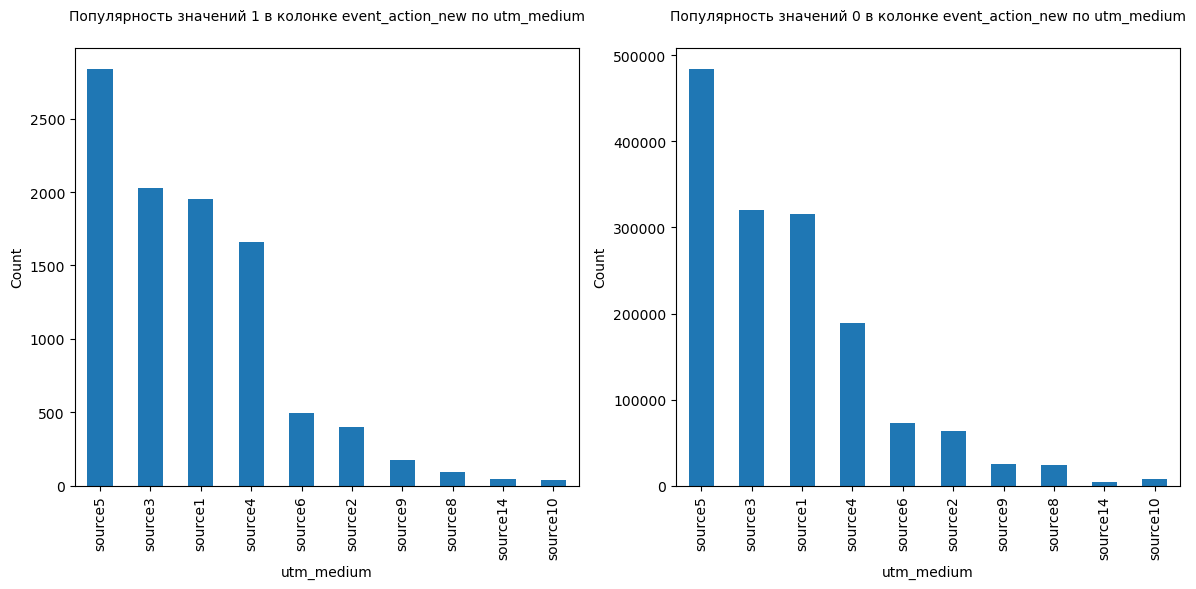

In [16]:
top_10_3 = grouped_sorted3.head(10)
top_10_3_only_1 = top_10_3[1]
plt.subplot(1, 2, 1)
top_10_3_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по utm_medium', pad=20, fontsize=10)
plt.xlabel('utm_medium')
plt.ylabel('Count')

top_10_3_only_0 = top_10_3[0]
plt.subplot(1, 2, 2)
top_10_3_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по utm_medium', pad=20, fontsize=10)
plt.xlabel('utm_medium')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
unique_sources4 = merged_sh['utm_adcontent'].unique()
replacement_map4 = {source: f'source{i+1}' for i, source in enumerate(unique_sources4) if source != 'other'}
merged_sh['utm_adcontent'] = merged_sh['utm_adcontent'].map(replacement_map4).fillna(merged_sh['utm_adcontent'])

grouped4 = merged_sh.groupby(['utm_adcontent', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted4 = grouped4.sort_values(by=1, ascending=False)
print(grouped_sorted4)

event_action_new       0     1
utm_adcontent                 
source2           940727  6616
other             278064  1827
source7           179990   715
source5            18957   231
source4            34306   207
...                  ...   ...
source183              2     0
source184              6     0
source185              8     0
source186              3     0
source99             108     0

[245 rows x 2 columns]


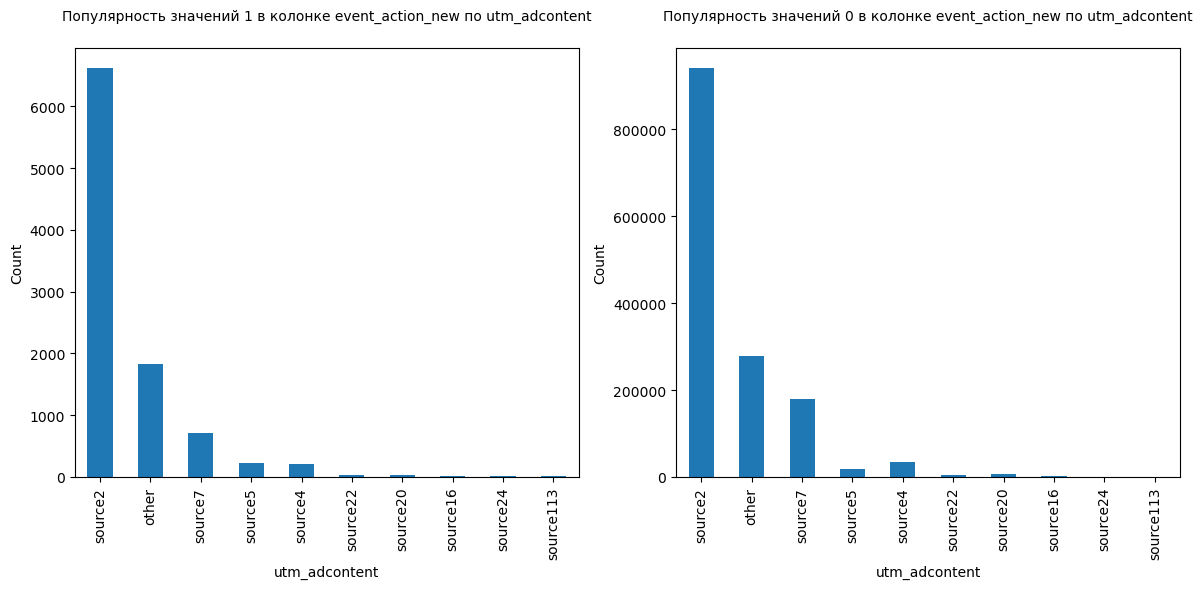

In [18]:
top_10_4 = grouped_sorted4.head(10)
top_10_4_only_1 = top_10_4[1]
plt.subplot(1, 2, 1)
top_10_4_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по utm_adcontent', pad=20, fontsize=10)
plt.xlabel('utm_adcontent')
plt.ylabel('Count')

top_10_4_only_0 = top_10_4[0]
plt.subplot(1, 2, 2)
top_10_4_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по utm_adcontent', pad=20, fontsize=10)
plt.xlabel('utm_adcontent')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
grouped5 = merged_sh.groupby(['device_category', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted5 = grouped5.sort_values(by=1, ascending=False)
print(grouped_sorted5)

event_action_new        0     1
device_category                
mobile            1135054  7393
desktop            386819  2405
tablet              14111    86


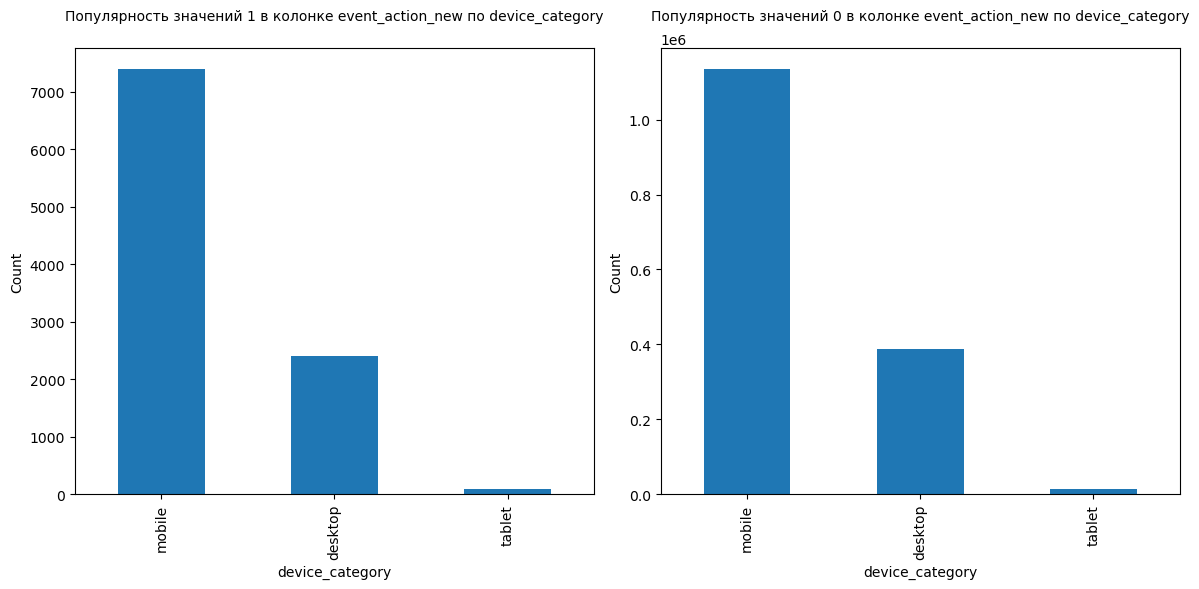

In [20]:
top_10_5 = grouped_sorted5.head(10)
top_10_5_only_1 = top_10_5[1]
plt.subplot(1, 2, 1)
top_10_5_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по device_category', pad=20, fontsize=10)
plt.xlabel('device_category')
plt.ylabel('Count')

top_10_5_only_0 = top_10_5[0]
plt.subplot(1, 2, 2)
top_10_5_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по device_category', pad=20, fontsize=10)
plt.xlabel('device_category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [21]:
grouped6 = merged_sh.groupby(['device_screen_resolution', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted6 = grouped6.sort_values(by=1, ascending=False)
print(grouped_sorted6)

event_action_new               0    1
device_screen_resolution             
414x896                   145163  828
1920x1080                 136689  747
375x812                   102121  654
412x915                    64407  550
393x851                    88116  548
...                          ...  ...
350x720                       11    0
350x737                        7    0
351x701                        3    0
351x720                        2    0
999x699                        1    0

[3058 rows x 2 columns]


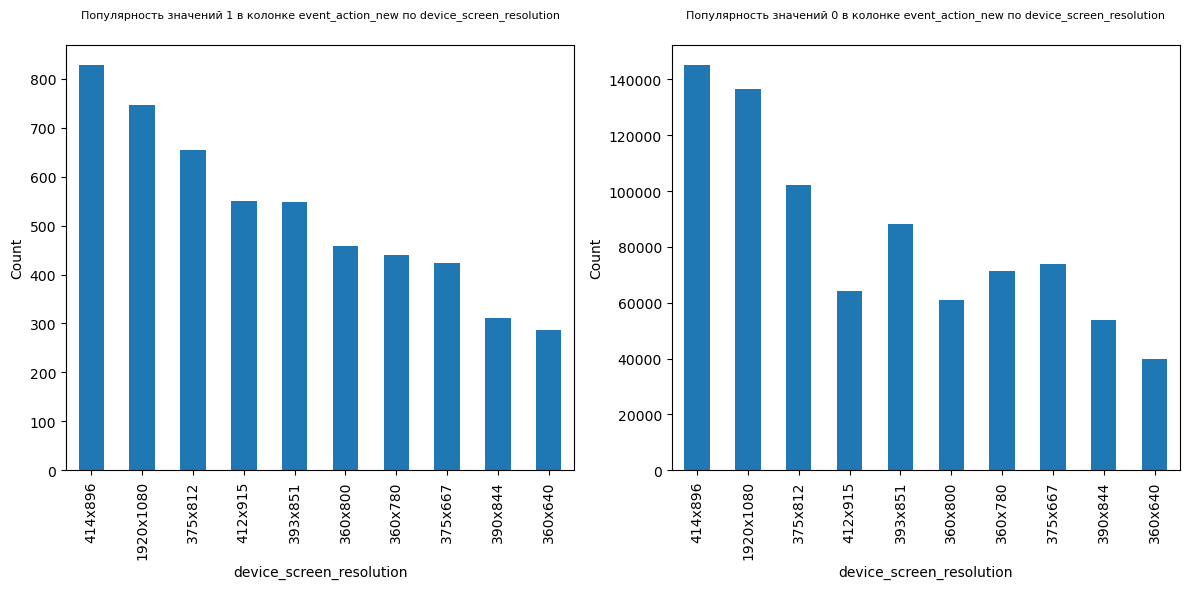

In [22]:
top_10_6 = grouped_sorted6.head(10)
top_10_6_only_1 = top_10_6[1]
plt.subplot(1, 2, 1)
top_10_6_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по device_screen_resolution', pad=20, fontsize=8)
plt.xlabel('device_screen_resolution')
plt.ylabel('Count')

top_10_6_only_0 = top_10_6[0]
plt.subplot(1, 2, 2)
top_10_6_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по device_screen_resolution', pad=20, fontsize=8)
plt.xlabel('device_screen_resolution')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [23]:
grouped7 = merged_sh.groupby(['device_browser', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted7 = grouped7.sort_values(by=1, ascending=False)
print(grouped_sorted7)

event_action_new                       0     1
device_browser                                
Chrome                            802124  5411
Safari                            412025  2591
YaBrowser                         128368   794
Android Webview                    44879   323
Samsung Internet                   25690   239
Safari (in-app)                    63438   180
Firefox                            20197   134
Edge                               19280   115
Opera                              19066    84
UC Browser                           487    10
com.vk.vkclient                       13     2
Maxthon                               11     1
MRCHROME                              30     0
Mozilla                                7     0
Mozilla Compatible Agent              79     0
MyApp                                  3     0
(not set)                              8     0
Opera Mini                             5     0
Puffin                                18     0
Internet Expl

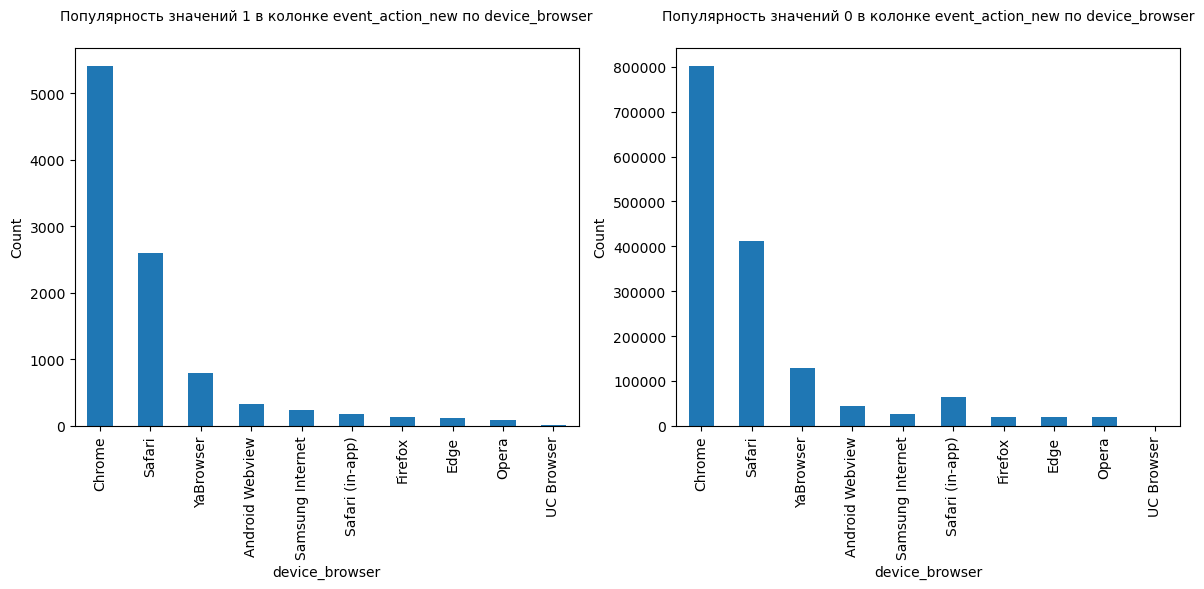

In [24]:
top_10_7 = grouped_sorted7.head(10)
top_10_7_only_1 = top_10_7[1]
plt.subplot(1, 2, 1)
top_10_7_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по device_browser', pad=20, fontsize=10)
plt.xlabel('device_browser')
plt.ylabel('Count')

top_10_7_only_0 = top_10_7[0]
plt.subplot(1, 2, 2)
top_10_7_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по device_browser', pad=20, fontsize=10)
plt.xlabel('device_browser')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
grouped8 = merged_sh.groupby(['geo_country', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted8 = grouped8.sort_values(by=1, ascending=False)
print(grouped_sorted8)

event_action_new        0     1
geo_country                    
Russia            1494925  9702
Ukraine              7499    37
Germany              2482    25
United States        3457     9
Sweden                980     9
...                   ...   ...
Guernsey                1     0
Guatemala               5     0
Guadeloupe              1     0
Greece                319     0
Wallis & Futuna         9     0

[146 rows x 2 columns]


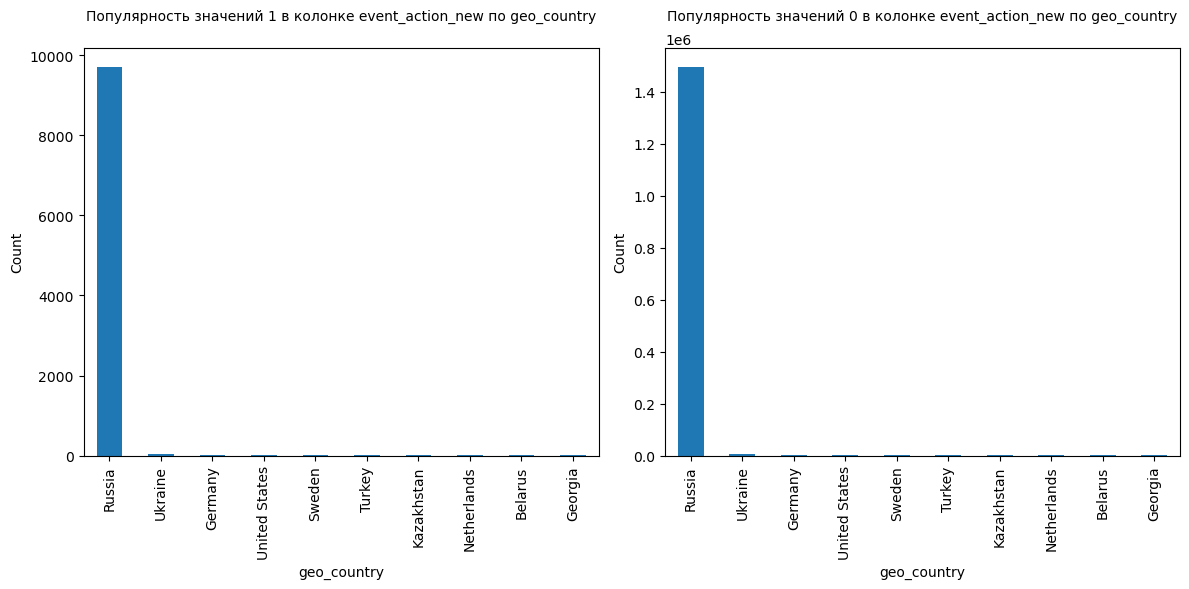

In [26]:
top_10_8 = grouped_sorted8.head(10)
top_10_8_only_1 = top_10_8[1]
plt.subplot(1, 2, 1)
top_10_8_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по geo_country', pad=20, fontsize=10)
plt.xlabel('geo_country')
plt.ylabel('Count')

top_10_8_only_0 = top_10_8[0]
plt.subplot(1, 2, 2)
top_10_8_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по geo_country', pad=20, fontsize=10)
plt.xlabel('geo_country')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [27]:
grouped9 = merged_sh.groupby(['geo_city', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted9 = grouped9.sort_values(by=1, ascending=False)
print(grouped_sorted9)

event_action_new       0     1
geo_city                      
Moscow            662780  4958
Saint Petersburg  231619  1346
(not set)          58683   292
Kazan              26885   235
Krasnodar          28856   203
...                  ...   ...
Holon                 17     0
Ho Chi Minh City      21     0
Hlobyne                1     0
Hilversum              1     0
Хомутово             113     0

[1771 rows x 2 columns]


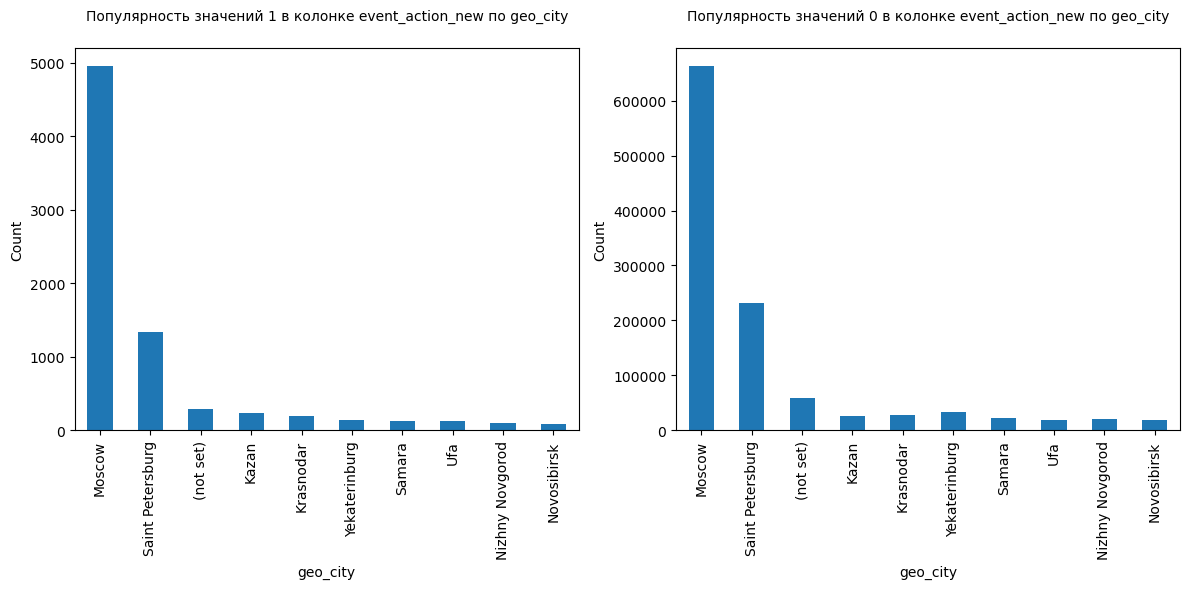

In [28]:
top_10_9 = grouped_sorted9.head(10)
top_10_9_only_1 = top_10_9[1]
plt.subplot(1, 2, 1)
top_10_9_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по geo_city', pad=20, fontsize=10)
plt.xlabel('geo_city')
plt.ylabel('Count')

top_10_9_only_0 = top_10_9[0]
plt.subplot(1, 2, 2)
top_10_9_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по geo_city', pad=20, fontsize=10)
plt.xlabel('geo_city')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [29]:
grouped10 = merged_sh.groupby(['visit_number', 'event_action_new']).size().unstack(fill_value=0)
grouped_sorted10 = grouped10.sort_values(by=1, ascending=False)
print(grouped_sorted10)

event_action_new        0     1
visit_number                   
1                 1133371  6097
2                  199443  1445
3                   64313   620
4                   36927   388
5                   19664   227
...                   ...   ...
215                    12     0
212                     6     0
210                    25     0
209                     5     0
564                     1     0

[433 rows x 2 columns]


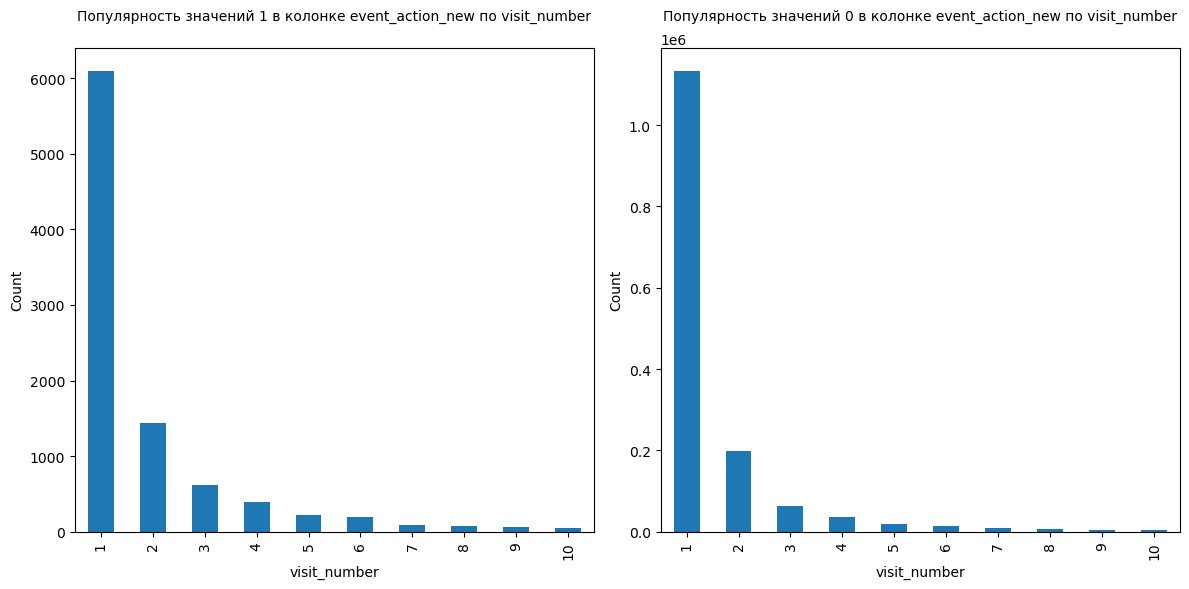

In [30]:
top_10_10 = grouped_sorted10.head(10)
top_10_10_only_1 = top_10_10[1]
plt.subplot(1, 2, 1)
top_10_10_only_1.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 1 в колонке event_action_new по visit_number', pad=20, fontsize=10)
plt.xlabel('visit_number')
plt.ylabel('Count')

top_10_10_only_0 = top_10_10[0]
plt.subplot(1, 2, 2)
top_10_10_only_0.plot(kind='bar', figsize=(12, 6))
plt.title('Популярность значений 0 в колонке event_action_new по visit_number', pad=20, fontsize=10)
plt.xlabel('visit_number')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [31]:
merged_sh.corr()

,hit_number,visit_number,event_action_new
hit_number,1.000000,0.020484,0.023252
visit_number,0.020484,1.000000,0.041398
event_action_new,0.023252,0.041398,1.000000


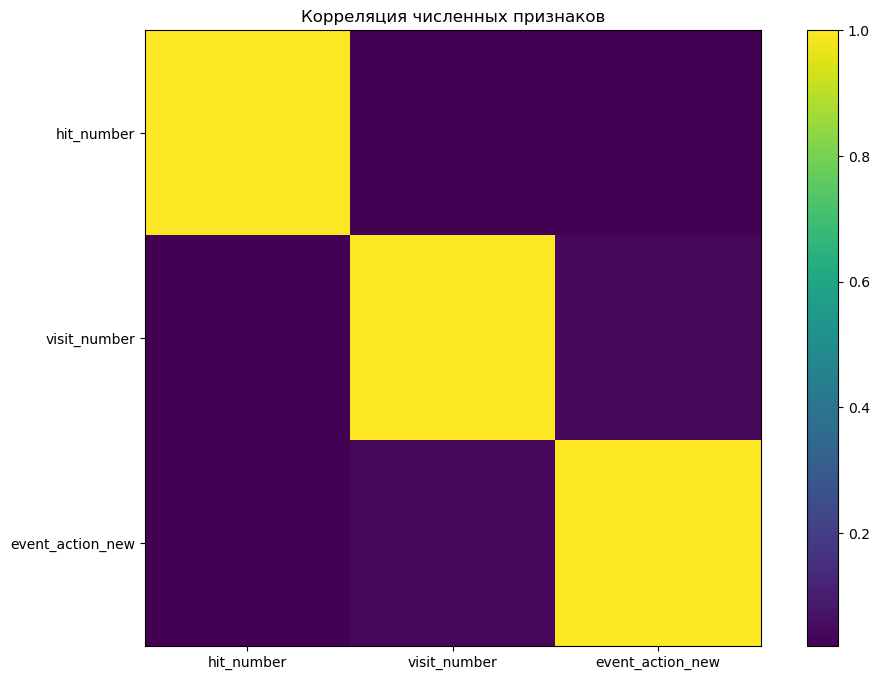

In [32]:
plt.figure(figsize=(12, 8))

columns = merged_sh.corr().columns.tolist()
plt.imshow(merged_sh.corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

Выполнил подготовительную работу и разведочный анализ данных в виде файла Jupyter Notebook
В датафреймах df_ga_hits и df_ga_sessions обработаны пропуски, удалены дубликаты или колонки с пропуском больше 20% данных.
Два датафрейма объединены, выполнена типизация данных. В колонке event_action все целевые действия заменены на 1, нецелевые - на 0.
Данные в подавляющем большинстве случаев категориальные, выполнил их группировку по соответствующим значениям 1 и 0 в event_action.
Значения в колонках, в виде наборов большого числа символов преобразовал в более читаемый вид. Графический анализ показал, что большинство колонок с категориальными данными имеет 4-6 значений, чаще других встречающихся и соотвенно влияющих в большей степени на целевую колонку.
Колонки visit_number, device_category, device_browser, geo_country и geo_city имеют 1-2 самых популярных значения как для целевых значений 0 так и 1 и должны в меньшей степени влиять на целевую колонку.
Измерение общей корреляции для числовых колонок датафрейма не выявило факторов, имеющих даже слабое влияние на целевое действие (слабая корреляция начинается с 0,5)

In [34]:
merged_sh.head(50)

,client_id,hit_number,hit_page_path,event_category,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime,event_action_new
11414563,161575999.1634969,13,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,sub_button_click,1,source1,source1,source1,other,mobile,491x1091,Chrome,Russia,Reutov,2021-10-23 09:09:33+00:00,0
1372827,106350095.16359366,3,sberauto.com/cars/lada-vaz?city=1&city=18&rent...,search_form,28,source2,source2,source2,source2,desktop,1920x1080,Chrome,Russia,Voronezh,2021-11-15 15:22:28+00:00,0
7034530,1632437837.1623676,27,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,1,source3,source3,source2,source2,mobile,375x812,Safari,Russia,Moscow,2021-06-14 16:00:00+00:00,0
8724065,45151329.16299263,68,sberauto.com/cars/eb5698f6?rental_page=rental_car,quiz,1,source3,source3,source2,source2,desktop,1280x720,YaBrowser,Russia,Nizhny Novgorod,2021-08-26 00:00:00+00:00,0
7419529,1371350061.1624916,2,podpiska.sberauto.com/,sub_page_view,1,source3,source3,source2,source2,mobile,360x760,Android Webview,Russia,Vladivostok,2021-06-29 00:00:00+00:00,0
11225786,1345775290.163164,123,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,1,source4,source4,source2,source2,desktop,1280x720,YaBrowser,Russia,Obninsk,2021-09-14 20:00:00+00:00,0
12728020,1717481627.1630623,45,sberauto.com/cars/76c0f0b5?utm_source_initial=...,card_web,2,source5,source5,source3,source2,mobile,414x896,Safari,Russia,Moscow,2021-09-04 02:00:00+00:00,0
9807934,984273176.1625924,3,podpiska.sberauto.com/,sub_page_view,3,source6,source6,source4,source3,mobile,412x915,Android Webview,Russia,Krasnodar,2021-07-14 16:00:00+00:00,0
14466187,1542700172.1635609,5,podpiska.sberauto.com/,sub_page_view,1,source7,source6,source4,source4,mobile,360x640,Chrome,Russia,Saint Petersburg,2021-10-30 18:54:19+00:00,0
13835437,436029300.1635368,19,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,1,source8,source1,other,other,desktop,1920x1080,YaBrowser,Russia,Moscow,2021-10-27 23:52:09+00:00,0


In [36]:
merged_sh.to_csv('merged_sh_py.csv', index=False)